<a href="https://colab.research.google.com/github/kdeffendol/heart-failure-prediction/blob/master/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Failure Prediction Application

#Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn import preprocessing
import ipywidgets as widgets
import seaborn as sns

#Get Data
The data being used is from Kaggle.com - it has been pulled from github for easy reading of the csv file.

In [ ]:
url = 'https://raw.githubusercontent.com/kdeffendol/heart-failure-prediction/master/heart.csv'
df = pd.read_csv(url)

#Data Set Visualization
Below are some views of the chosen data set to visualize the structure of the data that we will be working with.

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Below are the columns and each of the data types. We can also see that there are no null values in the data so no additional parsing will need to be done.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##Descriptive Methods

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc50f0426d0>,
      dtype=object)

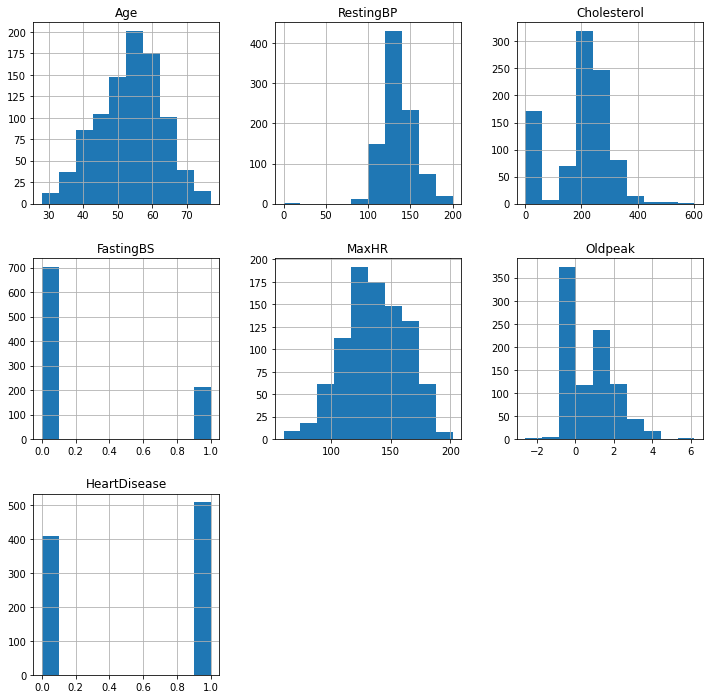

In [ ]:
#Here a histogram shows the variety in the data set for each of the different columns.
df.hist(figsize=(12,12))


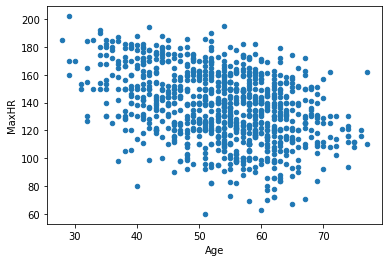

In [ ]:
#Here is a scatterplot comparing Age and MaxHR. You can see there's a slight downward trend with higher age and lowering heart rate.
df.plot.scatter(x = 'Age', y = 'MaxHR')

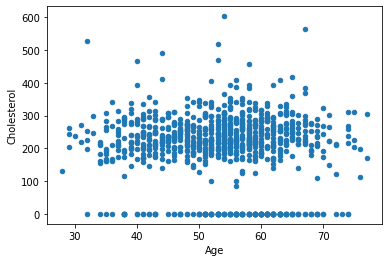

In [ ]:
df.plot.scatter(x='Age', y='Cholesterol')

#User Interaction
In this section, you will be able to enter in your own data to predict whether you are at risk of heart disease. This data will be fed to the prediction model. The model will get smarter the more data it sees.

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
age_field = widgets.IntText(description='Age:')
display(age_field)

IntText(value=0, description='Age:')

In [ ]:
sex_field = widgets.Dropdown(
    options=[('Male', 1), ('Female', 0)],
    description='Sex: '
)
display(sex_field)

Dropdown(description='Sex: ', options=(('Male', 1), ('Female', 0)), value=1)

In [ ]:
chestpain_field = widgets.Dropdown(
    options=['ASY', 'NAP', 'ATA', 'TA'],
    description='Chest Pain Type: '
)
display(chestpain_field)

Dropdown(description='Chest Pain Type: ', options=('ASY', 'NAP', 'ATA', 'TA'), value='ASY')

In [ ]:
restingbp_field = widgets.BoundedIntText(
    min=0,
    max=200,
    description='Resting Blood Pressure'
)
display(restingbp_field)

BoundedIntText(value=0, description='Resting Blood Pressure', max=200)

In [ ]:
cholesterol_field = widgets.IntText(description='Cholesterol:')
display(cholesterol_field)

IntText(value=0, description='Cholesterol:')

In [ ]:
fasting_field = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    description='Fasting?: '
)
display(fasting_field)

Dropdown(description='Fasting?: ', options=(('Yes', 1), ('No', 0)), value=1)

In [ ]:
restingecg_field = widgets.Dropdown(
    options=['Normal', 'LVH', 'ST'],
    description='Resting ECG: '
)
display(restingecg_field)

Dropdown(description='Resting ECG: ', options=('Normal', 'LVH', 'ST'), value='Normal')

In [ ]:
maxhr_field = widgets.BoundedIntText(
    min=0,
    max=250,
    description='Max Heart Rate'
)
display(maxhr_field)

BoundedIntText(value=0, description='Max Heart Rate', max=250)

In [ ]:
exerciseangina_field = widgets.Dropdown(
    options=[('Yes', 1), ('No', 0)],
    description='Exercise Angina?: '
)
display(exerciseangina_field)

Dropdown(description='Exercise Angina?: ', options=(('Yes', 1), ('No', 0)), value=1)

In [ ]:
oldpeak_field = widgets.BoundedFloatText(
    min=-10.0,
    max=10.0,
    description='Old Peak:'
)
display(oldpeak_field)

BoundedFloatText(value=0.0, description='Old Peak:', max=10.0, min=-10.0)

In [ ]:
stslope_field = widgets.Dropdown(
    options=['Flat', 'Up', 'Down'],
    description='ST Slope: '
)
display(stslope_field)

Dropdown(description='ST Slope: ', options=('Flat', 'Up', 'Down'), value='Flat')

#Separate Data & Create Model

##Format data from form fields into a dictionary

In [ ]:
data_dict = {'Age': [age_field.value],
        'Sex': [sex_field.value],
        'ChestPainType': [chestpain_field.value],
        'RestingBP': [restingbp_field.value],
        'Cholesterol': [cholesterol_field.value],
        'FastingBS': [fasting_field.value],
        'RestingECG': [restingecg_field.value],
        'MaxHR': [maxhr_field.value],
        'ExerciseAngina': [exerciseangina_field.value],
        'Oldpeak': [oldpeak_field.value],
        'ST_Slope': [stslope_field.value]}

user_df = pd.DataFrame(data=data_dict, index=[9999])

#Parsing data
Here we are formatting the data to get it ready for the model.

In [ ]:
#convert columns to binary for easier reading.
df['Sex'] = np.where(df['Sex'] == 'M', 1, 0)
df['ExerciseAngina'] = np.where(df['ExerciseAngina'] == 'Y', 1, 0)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [ ]:
y = df.HeartDisease
x = df.drop('HeartDisease', axis=1)

#Add in user data to get parsed
x = x.append(user_df)

#convert to binary
x = pd.get_dummies(x)

#keep user data separate to add back into test data
user_test_data = x.iloc[-1]
x = x.drop(x.tail(1).index)

x.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


In [ ]:
#Separate training vs testing data
# 70% of the data will be used for training, and 30% will be for testing the accuracy of the prediction model.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

x_test = x_test.append(user_test_data)

##Non-Descriptive Method
For the non-descriptive method, logistic regression will be used. A prediction model will be created to predict whether a patient is at risk of heart failure or not.

In [ ]:
model = linear_model.LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
#Remove user entered data from predictions
user_prediction = y_pred[-1]
y_pred = np.delete(y_pred, -1)

Analytics: Here the accuracy of the prediction model is shown.

In [ ]:
print('Accuracy of the Prediction model:', metrics.accuracy_score(y_test, y_pred))

Accuracy of the Prediction model: 0.8514492753623188


Prediction based on the data entered from the interactive fields:

In [ ]:
#User Data Prediction
if (user_prediction == 1):
  print("The prediction model detects a risk of heart failure from the entered data.")
else:
  print("The prediction model did not detect a risk of heart failure from the entered data.")

The prediction model detects a risk of heart failure from the entered data.


The linear regression model below shows the results of the Age and MaxHR through a line of best fit.

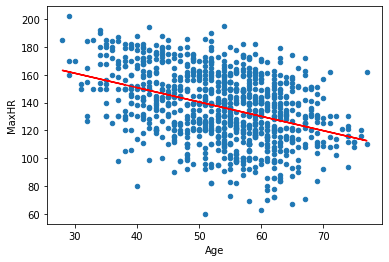

In [ ]:
d = np.polyfit(df['Age'], df['MaxHR'], 1)
f = np.poly1d(d)

df.insert(12, 'HRReg', f(df['Age']))

ax = df.plot.scatter(x = 'Age', y = 'MaxHR')
df.plot(x = 'Age', y='HRReg', color='Red', legend=False, ax = ax)

The following graphs below show relationships between the different fields and the risk of heart disease. Cholesterol seems to not be a very good predictor but Oldpeak is a strong predictor in determining heart failure.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


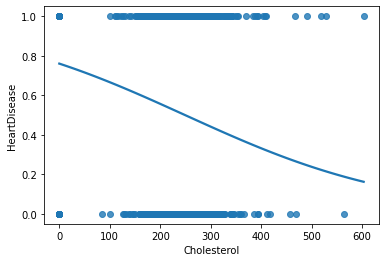

In [ ]:
sns.regplot(x= df['Cholesterol'], y= df['HeartDisease'], data = df, logistic=True, ci=None)

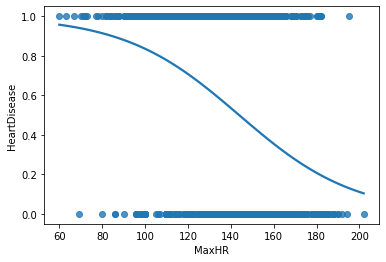

In [ ]:
sns.regplot(x= df['MaxHR'], y= df['HeartDisease'], data = df, logistic=True, ci=None)

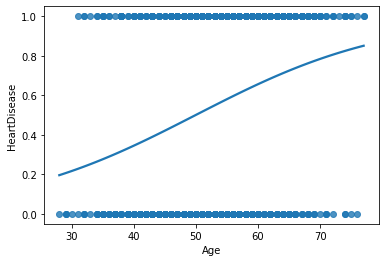

In [ ]:
sns.regplot(x= df['Age'], y= df['HeartDisease'], data = df, logistic=True, ci=None)

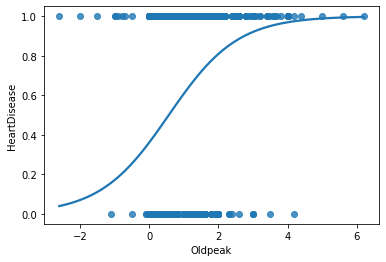

In [ ]:
sns.regplot(x= df['Oldpeak'], y= df['HeartDisease'], data = df, logistic=True, ci=None)